# DSP Lab 2.2
## Title:
Grouping and Aggregation.

## Objective:
On completion of this lab, students should be able to:
1. Group and aggregate data as per the requirements.

## Tools, Equipment and Materials:
1. Personal Computer with Internet access
2. Jupyter Notebook / Pycharm / Spyder IDE

***

<h1 id="Import-packages"><span style="color: #e67e23;">Import packages</span></h1>

In [1]:
# import pandas and numpy package
import pandas as pd
import numpy as np

***

<h1><span style="color: #e67e23;">Pandas GroupBy</span></h1>

<p><span style="font-size: 12pt; color: #e67e23;">In the following example code, we demonstrate the process of using groupby() and agg() functions using the Intake Count of Full-Time and Traineeship Programmes at ITE dataset. </span></p>
<p><span style="font-size: 12pt; color: #e67e23;">First, we create dataframe using "intake-count-of-full-time-and-traineeship-programmes-at-ite.csv" file.</span></p>
<p>&nbsp;</p>
<p><span style="font-size: 12pt; color: #e67e23;">Source: <a style="color: #e67e23;" href="https://data.gov.sg/dataset/intake-of-students-trainees-under-the-full-time-institutional-training-and-traineeship-programmes" target="_blank" rel="nofollow noopener">https://data.gov.sg/dataset/intake-of-students-trainees-under-the-full-time-institutional-training-and-traineeship-programmes</a></span></p>

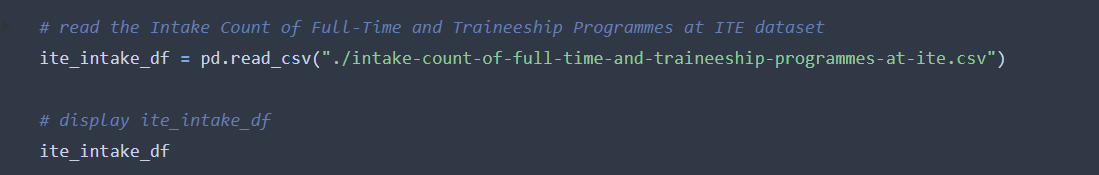

In [2]:
# read the Intake Count of Full-Time and Traineeship Programmes at ITE dataset
# notice the file name is long, use tab key to help you auto complete!!
ite_intake_df = pd.read_csv("./intake-count-of-full-time-and-traineeship-programmes-at-ite.csv")

# display ite_intake_df
ite_intake_df


,year,gender,nmc_course_level,intake_count
0,2017,Male,Engineering: Diploma,81
1,2017,Male,Engineering: Higher NITEC,2316
2,2017,Male,Engineering: NITEC,3672
3,2017,Male,Info-Communications Technology: Higher NITEC,528
4,2017,Male,Info-Communications Technology: NITEC,867
...,...,...,...,...
99,2021,Female,Info-Communications Technology: NITEC,323
100,2021,Female,Business & Services: Diploma,8
101,2021,Female,Business & Services: Work-Study Diploma,141
102,2021,Female,Business & Services: Higher NITEC,1644


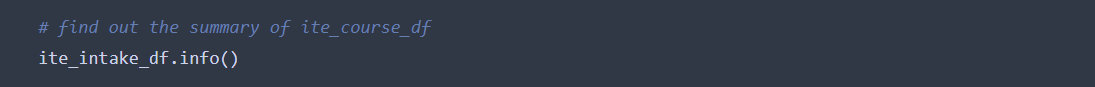

In [3]:
# find out the summary of ite_course_df
ite_intake_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   year              104 non-null    int64 
 1   gender            104 non-null    object
 2   nmc_course_level  104 non-null    object
 3   intake_count      104 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 3.4+ KB


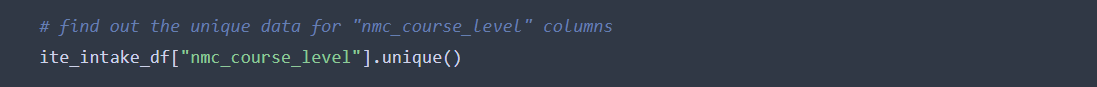

In [4]:
# find out the unique data for "nmc_course_level" columns
ite_intake_df["nmc_course_level"].unique()

array(['Engineering: Diploma', 'Engineering: Higher NITEC',
       'Engineering: NITEC',
       'Info-Communications Technology: Higher NITEC',
       'Info-Communications Technology: NITEC',
       'Business & Services: Diploma',
       'Business & Services: Higher NITEC', 'Business & Services: NITEC',
       'Engineering: Work-Study Diploma',
       'Info-Communications Technology: Work-Study Diploma',
       'Business & Services: Work-Study Diploma',
       'Info-Communications Technology:Work-Study  Diploma'], dtype=object)

<p><span style="text-decoration: underline;"><strong><span style="font-size: 12pt; color: #e67e23; text-decoration: underline;">Check columns' data types</span></strong></span></p>
<p><span style="font-size: 12pt; color: #e67e23;">After importing a dataset, we should check the data type of each column. </span></p>
<p><span style="font-size: 12pt; color: #e67e23;">If we discover incorrect data types, we can cast it to the appropriate data types.</span></p>

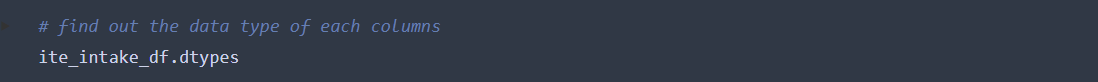

In [5]:
# find out the data type of each columns
ite_intake_df.dtypes


year                 int64
gender              object
nmc_course_level    object
intake_count         int64
dtype: object

<p><span style="text-decoration: underline; color: #e67e23;"><strong><span style="font-size: 12pt;">Cast columns' data types (convert data type)</span></strong></span></p>
<p><span style="font-size: 12pt; color: #e67e23;">From the code above, we discovered:</span></p>
<p style="padding-left: 40px;"><span style="font-size: 12pt; color: #e67e23;">1. "year" and "intake_count" is <strong>int64</strong></span></p>
<p style="padding-left: 40px;"><span style="font-size: 12pt; color: #e67e23;">2. "gender" and "nmc_course_level" is <strong>object</strong></span></p>
<p style="padding-left: 40px;">&nbsp;</p>
<p><span style="font-size: 12pt; color: #e67e23;">Say we want to cast these columns into the following data types:</span></p>
<p style="padding-left: 40px;"><span style="font-size: 12pt; color: #e67e23;">1.&nbsp; "year" and "intake_count" is <strong>int32</strong></span></p>
<p style="padding-left: 40px;"><span style="font-size: 12pt; color: #e67e23;">2. "gender" and "nmc_course_level" is <strong>string</strong></span></p>
<p>&nbsp;</p>
<p><span style="font-size: 12pt; color: #e67e23;">To cast a column data type into another, we can use astype() method as shown in example code below:</span></p>

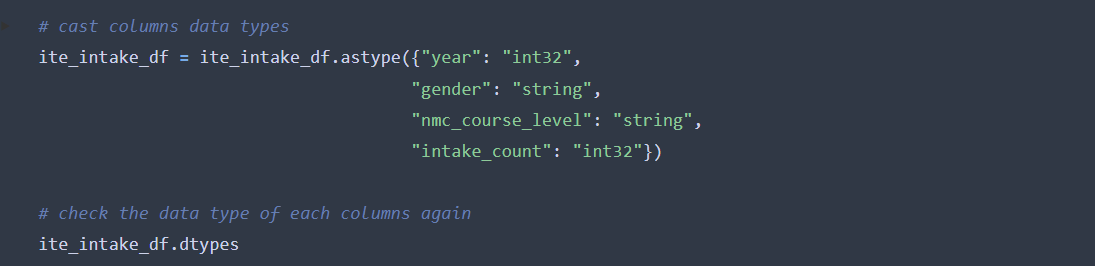

In [8]:
# cast columns data types
ite_intake_df = ite_intake_df.astype({"year": "int32",
                                     "gender": "string",
                                     "nmc_course_level": "string",
                                     "intake_count": "int32"})

# check the data type of each columns again
ite_intake_df.dtypes


year                         int32
gender              string[python]
nmc_course_level    string[python]
intake_count                 int32
dtype: object

---

<p><span style="text-decoration: underline;"><strong><span style="font-size: 12pt; color: #e67e23; text-decoration: underline;">Group the dataframe by Year</span></strong></span></p>
<p><span style="font-size: 12pt; color: #e67e23;">After we read the csv file, we can start to group it by year.</span></p>

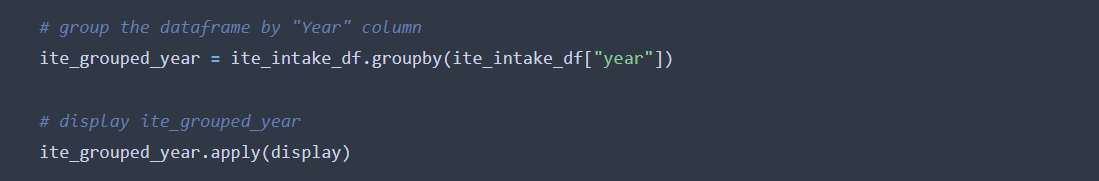

In [10]:
# group the dataframe by "Year" column
ite_grouped_year = ite_intake_df.groupby(ite_intake_df["year"])

# display ite_grouped_year
ite_grouped_year.apply(display)


,year,gender,nmc_course_level,intake_count
0,2017,Male,Engineering: Diploma,81
1,2017,Male,Engineering: Higher NITEC,2316
2,2017,Male,Engineering: NITEC,3672
3,2017,Male,Info-Communications Technology: Higher NITEC,528
4,2017,Male,Info-Communications Technology: NITEC,867
5,2017,Male,Business & Services: Diploma,16
6,2017,Male,Business & Services: Higher NITEC,938
7,2017,Male,Business & Services: NITEC,1363
8,2017,Female,Engineering: Diploma,10
9,2017,Female,Engineering: Higher NITEC,608


,year,gender,nmc_course_level,intake_count
16,2018,Male,Engineering: Diploma,87
17,2018,Male,Engineering: Work-Study Diploma,55
18,2018,Male,Engineering: Higher NITEC,2409
19,2018,Male,Engineering: NITEC,3205
20,2018,Male,Info-Communications Technology: Work-Study Dip...,17
21,2018,Male,Info-Communications Technology: Higher NITEC,646
22,2018,Male,Info-Communications Technology: NITEC,745
23,2018,Male,Business & Services: Diploma,19
24,2018,Male,Business & Services: Work-Study Diploma,4
25,2018,Male,Business & Services: Higher NITEC,1054


,year,gender,nmc_course_level,intake_count
38,2019,Male,Engineering: Diploma,61
39,2019,Male,Engineering: Work-Study Diploma,110
40,2019,Male,Engineering: Higher NITEC,2544
41,2019,Male,Engineering: NITEC,3070
42,2019,Male,Info-Communications Technology: Work-Study Dip...,25
43,2019,Male,Info-Communications Technology: Higher NITEC,751
44,2019,Male,Info-Communications Technology: NITEC,719
45,2019,Male,Business & Services: Diploma,14
46,2019,Male,Business & Services: Work-Study Diploma,46
47,2019,Male,Business & Services: Higher NITEC,1074


,year,gender,nmc_course_level,intake_count
60,2020,Male,Engineering: Diploma,77
61,2020,Male,Engineering: Work-Study Diploma,173
62,2020,Male,Engineering: Higher NITEC,2483
63,2020,Male,Engineering: NITEC,2950
64,2020,Male,Info-Communications Technology: Work-Study Dip...,47
65,2020,Male,Info-Communications Technology: Higher NITEC,734
66,2020,Male,Info-Communications Technology: NITEC,718
67,2020,Male,Business & Services: Diploma,15
68,2020,Male,Business & Services: Work-Study Diploma,81
69,2020,Male,Business & Services: Higher NITEC,1025


,year,gender,nmc_course_level,intake_count
82,2021,Male,Engineering: Diploma,77
83,2021,Male,Engineering: Work-Study Diploma,194
84,2021,Male,Engineering: Higher NITEC,2434
85,2021,Male,Engineering: NITEC,2965
86,2021,Male,Info-Communications Technology: Work-Study Dip...,56
87,2021,Male,Info-Communications Technology: Higher NITEC,699
88,2021,Male,Info-Communications Technology: NITEC,688
89,2021,Male,Business & Services: Diploma,12
90,2021,Male,Business & Services: Work-Study Diploma,100
91,2021,Male,Business & Services: Higher NITEC,1001


""


<p><span style="text-decoration: underline; color: #e67e23;"><strong><span style="font-size: 16px;">Find out sum of intake for each year</span></strong></span></p>
<p><span style="font-size: 12pt; color: #e67e23;">After we group the dataframe by "Year", we can use the "ite_grouped_year" to find out the sum of the intake for each year.</span></p>

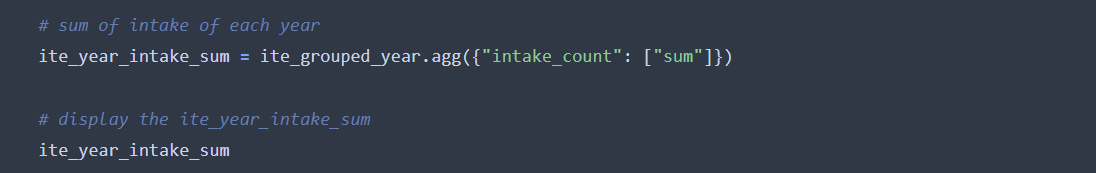

In [11]:
# sum of intake of each year
ite_year_intake_sum = ite_grouped_year.agg({"intake_count":["sum"]})

# display the ite_year_intake_sum
ite_year_intake_sum


,intake_count
,sum
year,
2017,15834
2018,15218
2019,15725
2020,15337
2021,15532


---

---

<p><span style="text-decoration: underline;"><strong><span style="font-size: 12pt; color: #e67e23; text-decoration: underline;">Groupby "Year" and "Gender" columns</span></strong></span></p>
<p><span style="font-size: 12pt; color: #e67e23;">In the example code below, we demonstrate group two columns, "Year" and "Gender".</span></p>

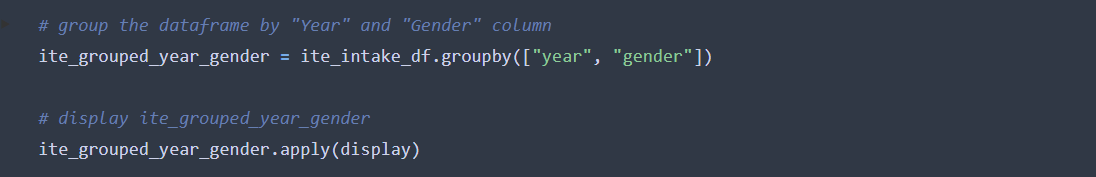

In [12]:
# group the dataframe by "Year" and "Gender" column
ite_grouped_year_gender = ite_intake_df.groupby(["year","gender"])

# display ite_grouped_year_gender
ite_grouped_year_gender.apply(display)


,year,gender,nmc_course_level,intake_count
8,2017,Female,Engineering: Diploma,10
9,2017,Female,Engineering: Higher NITEC,608
10,2017,Female,Engineering: NITEC,907
11,2017,Female,Info-Communications Technology: Higher NITEC,270
12,2017,Female,Info-Communications Technology: NITEC,396
13,2017,Female,Business & Services: Diploma,5
14,2017,Female,Business & Services: Higher NITEC,1554
15,2017,Female,Business & Services: NITEC,2303


,year,gender,nmc_course_level,intake_count
0,2017,Male,Engineering: Diploma,81
1,2017,Male,Engineering: Higher NITEC,2316
2,2017,Male,Engineering: NITEC,3672
3,2017,Male,Info-Communications Technology: Higher NITEC,528
4,2017,Male,Info-Communications Technology: NITEC,867
5,2017,Male,Business & Services: Diploma,16
6,2017,Male,Business & Services: Higher NITEC,938
7,2017,Male,Business & Services: NITEC,1363


,year,gender,nmc_course_level,intake_count
27,2018,Female,Engineering: Diploma,9
28,2018,Female,Engineering: Work-Study Diploma,4
29,2018,Female,Engineering: Higher NITEC,646
30,2018,Female,Engineering: NITEC,775
31,2018,Female,Info-Communications Technology:Work-Study Dip...,7
32,2018,Female,Info-Communications Technology: Higher NITEC,274
33,2018,Female,Info-Communications Technology: NITEC,344
34,2018,Female,Business & Services: Diploma,3
35,2018,Female,Business & Services: Work-Study Diploma,22
36,2018,Female,Business & Services: Higher NITEC,1546


,year,gender,nmc_course_level,intake_count
16,2018,Male,Engineering: Diploma,87
17,2018,Male,Engineering: Work-Study Diploma,55
18,2018,Male,Engineering: Higher NITEC,2409
19,2018,Male,Engineering: NITEC,3205
20,2018,Male,Info-Communications Technology: Work-Study Dip...,17
21,2018,Male,Info-Communications Technology: Higher NITEC,646
22,2018,Male,Info-Communications Technology: NITEC,745
23,2018,Male,Business & Services: Diploma,19
24,2018,Male,Business & Services: Work-Study Diploma,4
25,2018,Male,Business & Services: Higher NITEC,1054


,year,gender,nmc_course_level,intake_count
49,2019,Female,Engineering: Diploma,8
50,2019,Female,Engineering: Work-Study Diploma,13
51,2019,Female,Engineering: Higher NITEC,706
52,2019,Female,Engineering: NITEC,861
53,2019,Female,Info-Communications Technology: Work-Study Dip...,14
54,2019,Female,Info-Communications Technology: Higher NITEC,313
55,2019,Female,Info-Communications Technology: NITEC,327
56,2019,Female,Business & Services: Diploma,5
57,2019,Female,Business & Services: Work-Study Diploma,100
58,2019,Female,Business & Services: Higher NITEC,1631


,year,gender,nmc_course_level,intake_count
38,2019,Male,Engineering: Diploma,61
39,2019,Male,Engineering: Work-Study Diploma,110
40,2019,Male,Engineering: Higher NITEC,2544
41,2019,Male,Engineering: NITEC,3070
42,2019,Male,Info-Communications Technology: Work-Study Dip...,25
43,2019,Male,Info-Communications Technology: Higher NITEC,751
44,2019,Male,Info-Communications Technology: NITEC,719
45,2019,Male,Business & Services: Diploma,14
46,2019,Male,Business & Services: Work-Study Diploma,46
47,2019,Male,Business & Services: Higher NITEC,1074


,year,gender,nmc_course_level,intake_count
71,2020,Female,Engineering: Diploma,5
72,2020,Female,Engineering: Work-Study Diploma,30
73,2020,Female,Engineering: Higher NITEC,646
74,2020,Female,Engineering: NITEC,872
75,2020,Female,Info-Communications Technology: Work-Study Dip...,32
76,2020,Female,Info-Communications Technology: Higher NITEC,349
77,2020,Female,Info-Communications Technology: NITEC,295
78,2020,Female,Business & Services: Diploma,7
79,2020,Female,Business & Services: Work-Study Diploma,120
80,2020,Female,Business & Services: Higher NITEC,1556


,year,gender,nmc_course_level,intake_count
60,2020,Male,Engineering: Diploma,77
61,2020,Male,Engineering: Work-Study Diploma,173
62,2020,Male,Engineering: Higher NITEC,2483
63,2020,Male,Engineering: NITEC,2950
64,2020,Male,Info-Communications Technology: Work-Study Dip...,47
65,2020,Male,Info-Communications Technology: Higher NITEC,734
66,2020,Male,Info-Communications Technology: NITEC,718
67,2020,Male,Business & Services: Diploma,15
68,2020,Male,Business & Services: Work-Study Diploma,81
69,2020,Male,Business & Services: Higher NITEC,1025


,year,gender,nmc_course_level,intake_count
93,2021,Female,Engineering: Diploma,3
94,2021,Female,Engineering: Work-Study Diploma,30
95,2021,Female,Engineering: Higher NITEC,728
96,2021,Female,Engineering: NITEC,901
97,2021,Female,Info-Communications Technology: Work-Study Dip...,16
98,2021,Female,Info-Communications Technology: Higher NITEC,337
99,2021,Female,Info-Communications Technology: NITEC,323
100,2021,Female,Business & Services: Diploma,8
101,2021,Female,Business & Services: Work-Study Diploma,141
102,2021,Female,Business & Services: Higher NITEC,1644


,year,gender,nmc_course_level,intake_count
82,2021,Male,Engineering: Diploma,77
83,2021,Male,Engineering: Work-Study Diploma,194
84,2021,Male,Engineering: Higher NITEC,2434
85,2021,Male,Engineering: NITEC,2965
86,2021,Male,Info-Communications Technology: Work-Study Dip...,56
87,2021,Male,Info-Communications Technology: Higher NITEC,699
88,2021,Male,Info-Communications Technology: NITEC,688
89,2021,Male,Business & Services: Diploma,12
90,2021,Male,Business & Services: Work-Study Diploma,100
91,2021,Male,Business & Services: Higher NITEC,1001


""


<p><span style="font-size: 12pt; color: #e67e23;">After groupby "Year" and "Gender", you will notice each year is split into two group (Male and Female). Similarly, we can perform aggregation to find out the sum of intake for each year and gender.</span></p>

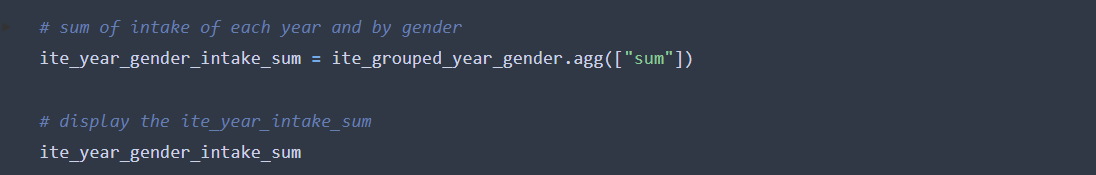

In [13]:
# sum of intake of each year and by gender
ite_year_gender_intake_sum = ite_grouped_year_gender.agg(["sum"])

# display the ite_year_intake_sum
ite_year_gender_intake_sum



nmc_course_level intake_count
                                                           sum          sum
year gender                                                                
2017 Female  Engineering: DiplomaEngineering: Higher NITECE...         6053
     Male    Engineering: DiplomaEngineering: Higher NITECE...         9781
2018 Female  Engineering: DiplomaEngineering: Work-Study Di...         5785
     Male    Engineering: DiplomaEngineering: Work-Study Di...         9433
2019 Female  Engineering: DiplomaEngineering: Work-Study Di...         6163
     Male    Engineering: DiplomaEngineering: Work-Study Di...         9562
2020 Female  Engineering: DiplomaEngineering: Work-Study Di...         5987
     Male    Engineering: DiplomaEngineering: Work-Study Di...         9350
2021 Female  Engineering: DiplomaEngineering: Work-Study Di...         6210
     Male    Engineering: DiplomaEngineering: Work-Study Di...         9322

---

<h1 id="DIY-Assignment:"><span style="color: #e67e23;">DIY Assignment:</span></h1>

<p><span style="font-size: 12pt; color: #e67e23;">In this DIY assignment, we will use the same dataset and dataframe created in code below.</span></p>

In [14]:
# read the Intake Count of Full-Time and Traineeship Programmes at ITE dataset
ite_intake_df = pd.read_csv("./intake-count-of-full-time-and-traineeship-programmes-at-ite.csv")

# display ite_intake_df
ite_intake_df

,year,gender,nmc_course_level,intake_count
0,2017,Male,Engineering: Diploma,81
1,2017,Male,Engineering: Higher NITEC,2316
2,2017,Male,Engineering: NITEC,3672
3,2017,Male,Info-Communications Technology: Higher NITEC,528
4,2017,Male,Info-Communications Technology: NITEC,867
...,...,...,...,...
99,2021,Female,Info-Communications Technology: NITEC,323
100,2021,Female,Business & Services: Diploma,8
101,2021,Female,Business & Services: Work-Study Diploma,141
102,2021,Female,Business & Services: Higher NITEC,1644


----

<p><span style="font-size: 12pt; color: #e67e23;">Q1. Group dataframe by <strong>"Gender"</strong> and then continue with the aggregation to find out the <strong>sum of intake</strong>.</span></p>

#### Q1 Step 1: use groupby() method

In [17]:
# Q1-Step 1.
# write python code here
ite_grouped_year = ite_intake_df.groupby(ite_intake_df["gender"])
ite_grouped_year.sum()



,year,nmc_course_level,intake_count
gender,,,
Female,104994,Engineering: DiplomaEngineering: Higher NITECE...,30198
Male,104994,Engineering: DiplomaEngineering: Higher NITECE...,47448


#### Q1 Step 2: use aggregate to calculate sum on "intake_count" based on "gender" group

In [20]:
# Q1-Step 2.
# write python code here
ite_grouped_year_sum=ite_grouped_year.agg(["sum"])
ite_grouped_year_sum


,year,nmc_course_level,intake_count
,sum,sum,sum
gender,,,
Female,104994,Engineering: DiplomaEngineering: Higher NITECE...,30198
Male,104994,Engineering: DiplomaEngineering: Higher NITECE...,47448


---

<p><span style="color: #e67e23; font-size: 16px;">Q2. Group dataframe by <strong>"Year" &amp; "nmc_course_level"</strong> and then continue with the <strong>aggregation to determine the sum of intake</strong>.</span></p>

#### Q2 Step 1: use groupby() method to group "Year" & "nmc_course_level" columns

In [52]:
# Q2-Step 1.
# write python code here
ite_grouped_year_nmc_course_level = ite_intake_df.groupby(["year","nmc_course_level"])
ite_grouped_year_nmc_course_level.apply(display)

,year,gender,nmc_course_level,intake_count
5,2017,Male,Business & Services: Diploma,16
13,2017,Female,Business & Services: Diploma,5


,year,gender,nmc_course_level,intake_count
6,2017,Male,Business & Services: Higher NITEC,938
14,2017,Female,Business & Services: Higher NITEC,1554


,year,gender,nmc_course_level,intake_count
7,2017,Male,Business & Services: NITEC,1363
15,2017,Female,Business & Services: NITEC,2303


,year,gender,nmc_course_level,intake_count
0,2017,Male,Engineering: Diploma,81
8,2017,Female,Engineering: Diploma,10


,year,gender,nmc_course_level,intake_count
1,2017,Male,Engineering: Higher NITEC,2316
9,2017,Female,Engineering: Higher NITEC,608


,year,gender,nmc_course_level,intake_count
2,2017,Male,Engineering: NITEC,3672
10,2017,Female,Engineering: NITEC,907


,year,gender,nmc_course_level,intake_count
3,2017,Male,Info-Communications Technology: Higher NITEC,528
11,2017,Female,Info-Communications Technology: Higher NITEC,270


,year,gender,nmc_course_level,intake_count
4,2017,Male,Info-Communications Technology: NITEC,867
12,2017,Female,Info-Communications Technology: NITEC,396


,year,gender,nmc_course_level,intake_count
23,2018,Male,Business & Services: Diploma,19
34,2018,Female,Business & Services: Diploma,3


,year,gender,nmc_course_level,intake_count
25,2018,Male,Business & Services: Higher NITEC,1054
36,2018,Female,Business & Services: Higher NITEC,1546


,year,gender,nmc_course_level,intake_count
26,2018,Male,Business & Services: NITEC,1192
37,2018,Female,Business & Services: NITEC,2155


,year,gender,nmc_course_level,intake_count
24,2018,Male,Business & Services: Work-Study Diploma,4
35,2018,Female,Business & Services: Work-Study Diploma,22


,year,gender,nmc_course_level,intake_count
16,2018,Male,Engineering: Diploma,87
27,2018,Female,Engineering: Diploma,9


,year,gender,nmc_course_level,intake_count
18,2018,Male,Engineering: Higher NITEC,2409
29,2018,Female,Engineering: Higher NITEC,646


,year,gender,nmc_course_level,intake_count
19,2018,Male,Engineering: NITEC,3205
30,2018,Female,Engineering: NITEC,775


,year,gender,nmc_course_level,intake_count
17,2018,Male,Engineering: Work-Study Diploma,55
28,2018,Female,Engineering: Work-Study Diploma,4


,year,gender,nmc_course_level,intake_count
21,2018,Male,Info-Communications Technology: Higher NITEC,646
32,2018,Female,Info-Communications Technology: Higher NITEC,274


,year,gender,nmc_course_level,intake_count
22,2018,Male,Info-Communications Technology: NITEC,745
33,2018,Female,Info-Communications Technology: NITEC,344


,year,gender,nmc_course_level,intake_count
20,2018,Male,Info-Communications Technology: Work-Study Dip...,17


,year,gender,nmc_course_level,intake_count
31,2018,Female,Info-Communications Technology:Work-Study Dip...,7


,year,gender,nmc_course_level,intake_count
45,2019,Male,Business & Services: Diploma,14
56,2019,Female,Business & Services: Diploma,5


,year,gender,nmc_course_level,intake_count
47,2019,Male,Business & Services: Higher NITEC,1074
58,2019,Female,Business & Services: Higher NITEC,1631


,year,gender,nmc_course_level,intake_count
48,2019,Male,Business & Services: NITEC,1148
59,2019,Female,Business & Services: NITEC,2185


,year,gender,nmc_course_level,intake_count
46,2019,Male,Business & Services: Work-Study Diploma,46
57,2019,Female,Business & Services: Work-Study Diploma,100


,year,gender,nmc_course_level,intake_count
38,2019,Male,Engineering: Diploma,61
49,2019,Female,Engineering: Diploma,8


,year,gender,nmc_course_level,intake_count
40,2019,Male,Engineering: Higher NITEC,2544
51,2019,Female,Engineering: Higher NITEC,706


,year,gender,nmc_course_level,intake_count
41,2019,Male,Engineering: NITEC,3070
52,2019,Female,Engineering: NITEC,861


,year,gender,nmc_course_level,intake_count
39,2019,Male,Engineering: Work-Study Diploma,110
50,2019,Female,Engineering: Work-Study Diploma,13


,year,gender,nmc_course_level,intake_count
43,2019,Male,Info-Communications Technology: Higher NITEC,751
54,2019,Female,Info-Communications Technology: Higher NITEC,313


,year,gender,nmc_course_level,intake_count
44,2019,Male,Info-Communications Technology: NITEC,719
55,2019,Female,Info-Communications Technology: NITEC,327


,year,gender,nmc_course_level,intake_count
42,2019,Male,Info-Communications Technology: Work-Study Dip...,25
53,2019,Female,Info-Communications Technology: Work-Study Dip...,14


,year,gender,nmc_course_level,intake_count
67,2020,Male,Business & Services: Diploma,15
78,2020,Female,Business & Services: Diploma,7


,year,gender,nmc_course_level,intake_count
69,2020,Male,Business & Services: Higher NITEC,1025
80,2020,Female,Business & Services: Higher NITEC,1556


,year,gender,nmc_course_level,intake_count
70,2020,Male,Business & Services: NITEC,1047
81,2020,Female,Business & Services: NITEC,2075


,year,gender,nmc_course_level,intake_count
68,2020,Male,Business & Services: Work-Study Diploma,81
79,2020,Female,Business & Services: Work-Study Diploma,120


,year,gender,nmc_course_level,intake_count
60,2020,Male,Engineering: Diploma,77
71,2020,Female,Engineering: Diploma,5


,year,gender,nmc_course_level,intake_count
62,2020,Male,Engineering: Higher NITEC,2483
73,2020,Female,Engineering: Higher NITEC,646


,year,gender,nmc_course_level,intake_count
63,2020,Male,Engineering: NITEC,2950
74,2020,Female,Engineering: NITEC,872


,year,gender,nmc_course_level,intake_count
61,2020,Male,Engineering: Work-Study Diploma,173
72,2020,Female,Engineering: Work-Study Diploma,30


,year,gender,nmc_course_level,intake_count
65,2020,Male,Info-Communications Technology: Higher NITEC,734
76,2020,Female,Info-Communications Technology: Higher NITEC,349


,year,gender,nmc_course_level,intake_count
66,2020,Male,Info-Communications Technology: NITEC,718
77,2020,Female,Info-Communications Technology: NITEC,295


,year,gender,nmc_course_level,intake_count
64,2020,Male,Info-Communications Technology: Work-Study Dip...,47
75,2020,Female,Info-Communications Technology: Work-Study Dip...,32


,year,gender,nmc_course_level,intake_count
89,2021,Male,Business & Services: Diploma,12
100,2021,Female,Business & Services: Diploma,8


,year,gender,nmc_course_level,intake_count
91,2021,Male,Business & Services: Higher NITEC,1001
102,2021,Female,Business & Services: Higher NITEC,1644


,year,gender,nmc_course_level,intake_count
92,2021,Male,Business & Services: NITEC,1096
103,2021,Female,Business & Services: NITEC,2079


,year,gender,nmc_course_level,intake_count
90,2021,Male,Business & Services: Work-Study Diploma,100
101,2021,Female,Business & Services: Work-Study Diploma,141


,year,gender,nmc_course_level,intake_count
82,2021,Male,Engineering: Diploma,77
93,2021,Female,Engineering: Diploma,3


,year,gender,nmc_course_level,intake_count
84,2021,Male,Engineering: Higher NITEC,2434
95,2021,Female,Engineering: Higher NITEC,728


,year,gender,nmc_course_level,intake_count
85,2021,Male,Engineering: NITEC,2965
96,2021,Female,Engineering: NITEC,901


,year,gender,nmc_course_level,intake_count
83,2021,Male,Engineering: Work-Study Diploma,194
94,2021,Female,Engineering: Work-Study Diploma,30


,year,gender,nmc_course_level,intake_count
87,2021,Male,Info-Communications Technology: Higher NITEC,699
98,2021,Female,Info-Communications Technology: Higher NITEC,337


,year,gender,nmc_course_level,intake_count
88,2021,Male,Info-Communications Technology: NITEC,688
99,2021,Female,Info-Communications Technology: NITEC,323


,year,gender,nmc_course_level,intake_count
86,2021,Male,Info-Communications Technology: Work-Study Dip...,56
97,2021,Female,Info-Communications Technology: Work-Study Dip...,16


""


#### Q2 Step 2: use aggregate to calculate sum on "intake_count" based on "year" and "nmc_course_level" group

In [53]:
# Q2-Step 2.
# write python code here
ite_year_intake_sum=ite_grouped_year_nmc_course_level.agg({'intake_count':['sum']})
ite_year_intake_sum


intake_count
                                                                 sum
year nmc_course_level                                               
2017 Business & Services: Diploma                                 21
     Business & Services: Higher NITEC                          2492
     Business & Services: NITEC                                 3666
     Engineering: Diploma                                         91
     Engineering: Higher NITEC                                  2924
     Engineering: NITEC                                         4579
     Info-Communications Technology: Higher NITEC                798
     Info-Communications Technology: NITEC                      1263
2018 Business & Services: Diploma                                 22
     Business & Services: Higher NITEC                          2600
     Business & Services: NITEC                                 3347
     Business & Services: Work-Study Diploma                      26
     Engineering: Diploma                                         96
     Engineering: Higher NITEC                                  3055
     Engineering: NITEC                                         3980
     Engineering: Work-Study Diploma                              59
     Info-Communications Technology: Higher NITEC                920
     Info-Communications Technology: NITEC                      1089
     Info-Communications Technology: Work-Study Diploma           17
     Info-Communications Technology:Work-Study  Diploma            7
2019 Business & Services: Diploma                                 19
     Business & Services: Higher NITEC                          2705
     Business & Services: NITEC                                 3333
     Business & Services: Work-Study Diploma                     146
     Engineering: Diploma                                         69
     Engineering: Higher NITEC                                  3250
     Engineering: NITEC                                         3931
     Engineering: Work-Study Diploma                             123
     Info-Communications Technology: Higher NITEC               1064
     Info-Communications Technology: NITEC                      1046
     Info-Communications Technology: Work-Study Diploma           39
2020 Business & Services: Diploma                                 22
     Business & Services: Higher NITEC                          2581
     Business & Services: NITEC                                 3122
     Business & Services: Work-Study Diploma                     201
     Engineering: Diploma                                         82
     Engineering: Higher NITEC                                  3129
     Engineering: NITEC                                         3822
     Engineering: Work-Study Diploma                             203
     Info-Communications Technology: Higher NITEC               1083
     Info-Communications Technology: NITEC                      1013
     Info-Communications Technology: Work-Study Diploma           79
2021 Business & Services: Diploma                                 20
     Business & Services: Higher NITEC                          2645
     Business & Services: NITEC                                 3175
     Business & Services: Work-Study Diploma                     241
     Engineering: Diploma                                         80
     Engineering: Higher NITEC                                  3162
     Engineering: NITEC                                         3866
     Engineering: Work-Study Diploma                             224
     Info-Communications Technology: Higher NITEC               1036
     Info-Communications Technology: NITEC                      1011
     Info-Communications Technology: Work-Study Diploma           72

---

<p><span style="color: #e67e23; font-size: 16px;">After completion, rename this file as "INDEX_NAME_DE43002FP_Lab2.2_DIY.ipynb" and submit in myConnexion.</span></p>

In [ ]:
29_fangxuan_DE43002FP_Lab2.2_DIY

***

Diagram below shown the varies computation of series of numbers.

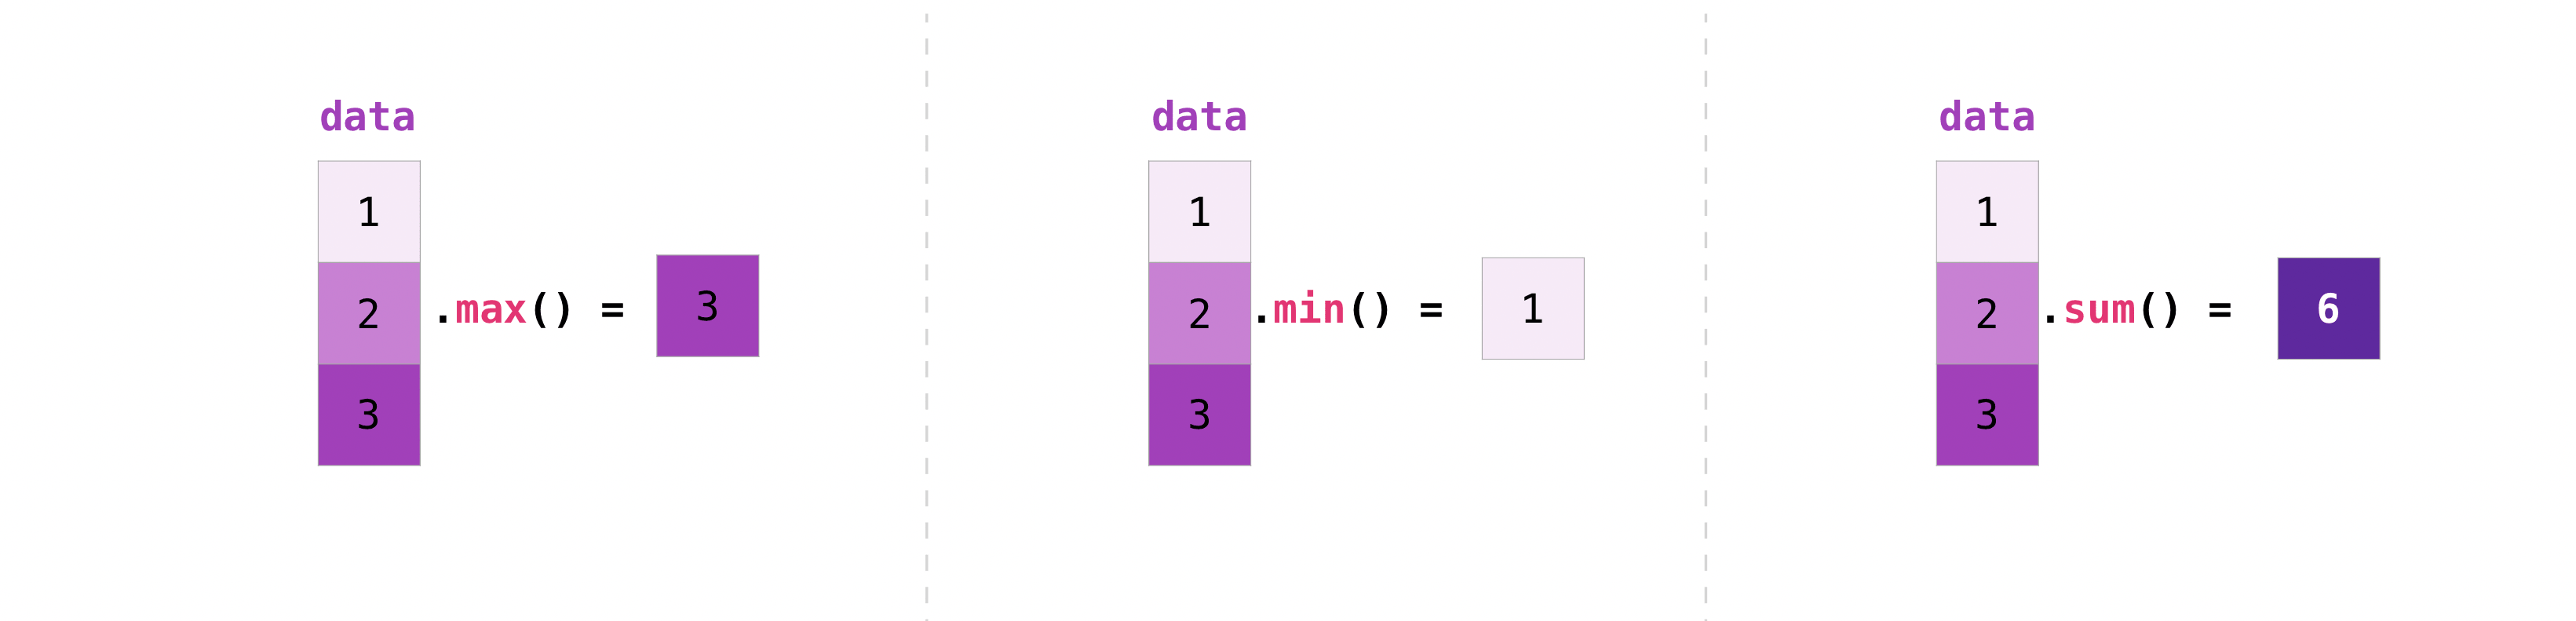

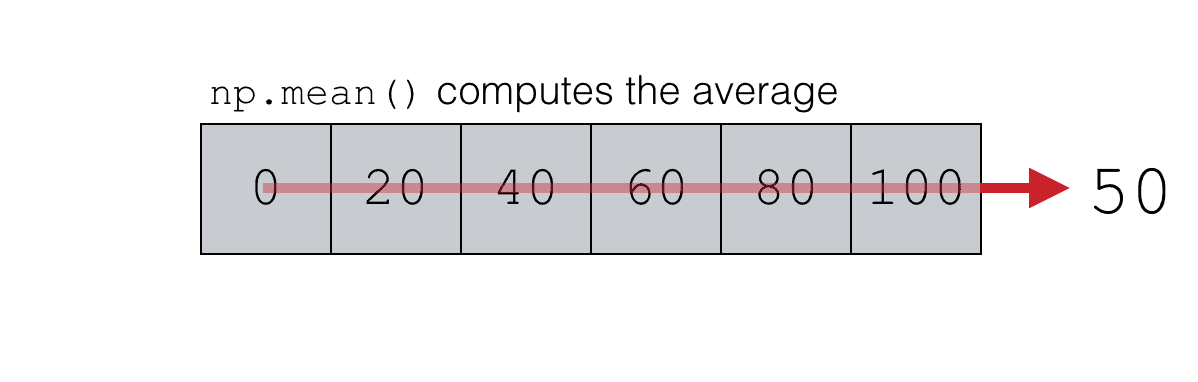

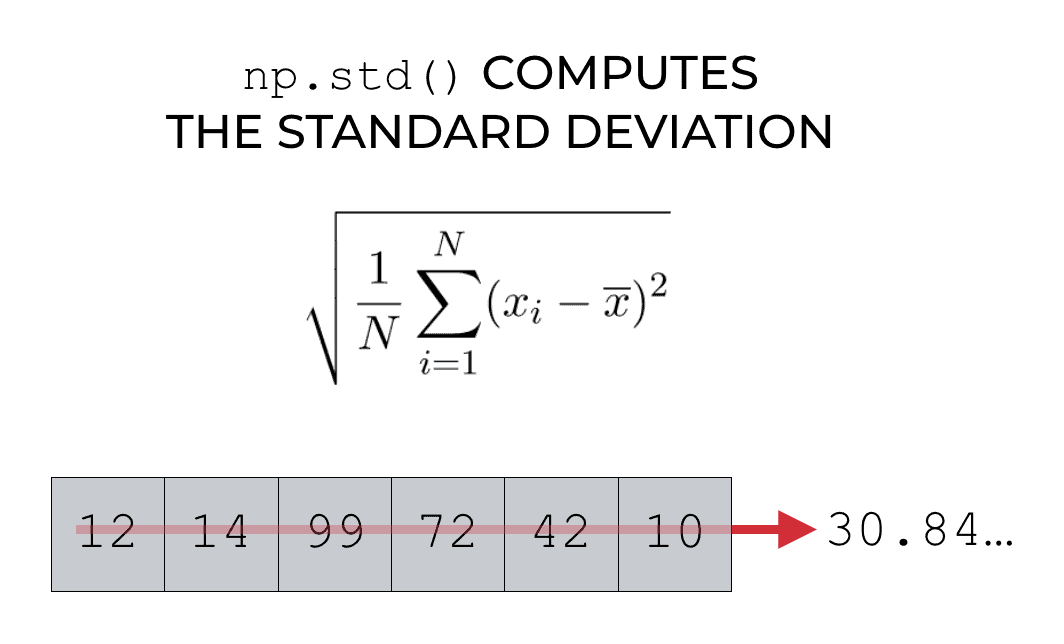

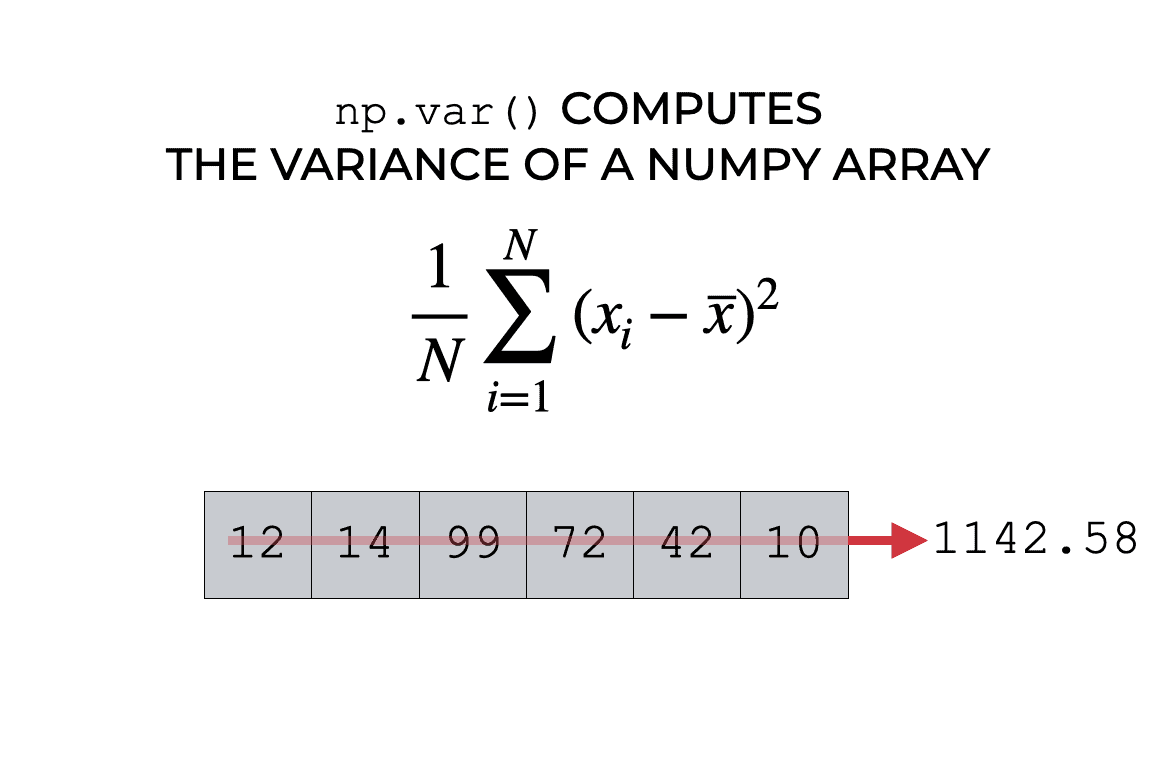